<a href="https://colab.research.google.com/github/pacomm5/Plantillas/blob/main/reduccion_dimensi%C3%B3n_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
#!git clone https://github.com/joanby/machinelearning-az.git
! git clone https://github.com/pacomm5/machinelearning-az

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10541, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 10541 (delta 25), reused 12 (delta 5), pack-reused 10505
Receiving objects: 100% (10541/10541), 311.58 MiB | 22.42 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [3]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [4]:
!pip install sklearn

# LDA

# Cómo importar las librerías


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [6]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 9 - Dimensionality Reduction/Section 44 - Linear Discriminant Analysis (LDA)/Wine.csv')

X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Escalado de variables

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Reducir la dimensión del dataset con LDA

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # aqui utilizamos LDA en vez de PCA

In [10]:
lda = LDA(n_components = 2) # aqui ponemos el numero de componentes que queremos
X_train = lda.fit_transform(X_train, y_train) # aqui le metemos y train porque es supervisado
X_test = lda.transform(X_test)

In [20]:
X_train

array([[ 3.57315552,  1.94018924],
       [ 0.85475898, -2.08182977],
       [ 0.62173655, -3.06234453],
       [ 4.80786412,  2.00638739],
       [-3.8579759 ,  0.14987256],
       [-3.59455458,  1.24961706],
       [-0.53772906, -3.0852704 ],
       [ 0.04058577, -2.47312446],
       [ 0.99835348, -3.36989668],
       [-3.74095658,  1.94844242],
       [ 3.76035226,  0.82126218],
       [-0.15106412, -1.86820292],
       [ 3.62762899,  2.05460026],
       [-3.94229781,  2.80328429],
       [ 3.33429017,  0.73627798],
       [ 3.90206871,  1.03276135],
       [-3.55835472,  0.18783108],
       [ 5.63175281,  2.40524214],
       [-5.56217254,  0.85694946],
       [ 0.23296188, -3.94615581],
       [ 5.03141997,  3.23313754],
       [ 3.52861651,  0.94605778],
       [-1.17815662, -2.17294825],
       [ 3.58320131,  0.67947364],
       [ 5.21649905,  2.41090952],
       [-3.01647841,  1.24411621],
       [ 1.86178658, -0.47484926],
       [ 3.93816398, -0.2204059 ],
       [-1.0836235 ,

# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predicción de los resultados con el Conjunto de Testing

In [13]:
y_pred  = classifier.predict(X_test)

In [21]:
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

# Elaborar una matriz de confusión

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

In [17]:
(14+16+6)/(14+16+6) # 100 por 100

1.0

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


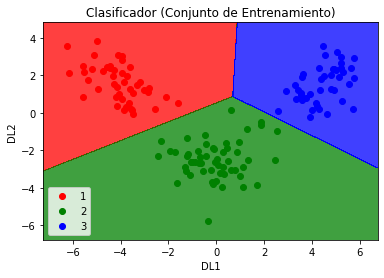

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('DL1')
plt.ylabel('DL2')
plt.legend()
plt.show()

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


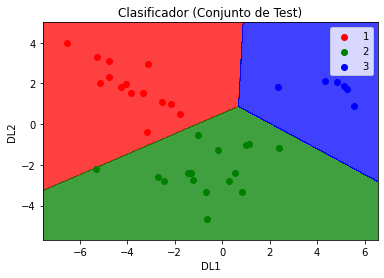

In [19]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('DL1')
plt.ylabel('DL2')
plt.legend()
plt.show()